In [1]:
import supereeg as se
import pandas as pd
import numpy as np
import os
import hypertools as hyp
import plot as plot
from scipy import stats
import matplotlib
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting as ni_plt

In [2]:
fig_dir = '../../paper/paper_figs/supplemental_2'

In [3]:
ram_data_dir = '../../data/ram'
pyfr_data_dir = '../../data/pyfr'

In [4]:
fig_count = 0

In [5]:
# def plot_corr_hist(dataframe, X, title=None, outfile=None):
#     mpl.rcParams['axes.facecolor'] = 'white'
#     df_corrs = pd.DataFrame()
#     df_corrs[X] = dataframe[X].values
#     n_count = len(df_corrs)
#     bin_values = np.arange(start=-1, stop=1, step=.025)
#     ax = df_corrs.plot(kind='hist', bins=bin_values, color='k', title = title, legend = False)
#     vals = ax.get_yticks()
#     ax.set_yticklabels([np.round(x/n_count,3) for x in vals])
#     ax.set_ylabel('Proportion of electrodes')
#     ax.set_xlabel(X)
#     ax.set_xlim(-1, 1)
#     plt.text(1,10, 'mean = '+ str(np.round(plot.z2r(plot.r2z(dataframe[X]).mean()),3)))

In [6]:
# def plot_hist_by_patient(dataframe, X, bins=20, title=None, outfile=None):
#     mpl.rcParams['axes.facecolor'] = 'white'
#     df = pd.DataFrame()
#     df[X] = dataframe[X].values
#     n_count = len(df)
#     #bin_values = np.arange(start=df[X].min(), stop=df[X].max())
#     ax = df.plot(kind='hist',histtype='stepfilled', bins=bins, color='k', title = X, legend = False)
#     ax.set_ylabel('# Patients')
#     ax.set_xlabel(X)
#     #ax.set_xlim(df[X].min(), df[X].max())
#     print('mean: ' + str(np.round(df[X].mean(),3)))

# PyFR analysis

In [7]:
e_corrs = pd.read_csv(os.path.join(pyfr_data_dir, 'pyfr.csv'), index_col=0)

In [8]:
e_corrs.head()

,across,within,Subject,R,Sample rate,Samples,Thresholded Electrodes,Sessions,Number thresholded,Total Time (hrs),Average Session Length (hrs),Total Electrodes,Proportion Thresholded
0,0.844742,0.639768,31,[-63.64 -21.93 5.37],250.0,3465000,10,7.0,42,3.850,0.550,52,0.808
1,0.861268,0.640264,8,[-48.48 38.4 17.26],250.0,1549237,121,2.0,2,1.721,0.860,123,0.016
2,0.665390,0.519857,13,[ 49.49 -34.7 35.17],250.0,2454000,44,4.0,79,2.727,0.682,123,0.642
3,0.641038,0.445575,52,[ 65.66 -67.29 25.83],250.0,3600000,82,2.0,16,4.000,2.000,98,0.163
4,0.764453,0.504416,25,[-36.36 -1.81 59.76],250.0,447750,98,1.0,2,0.498,0.498,100,0.020


In [9]:
grouped_results_pyfr = e_corrs.groupby('Subject')['within', 'across', 'Sample rate', 'Samples', 
                                                  'Sessions', 'Number thresholded', 'Total Time (hrs)', 'Average Session Length (hrs)', 
                                                  'Total Electrodes', 'Proportion Thresholded'].mean()

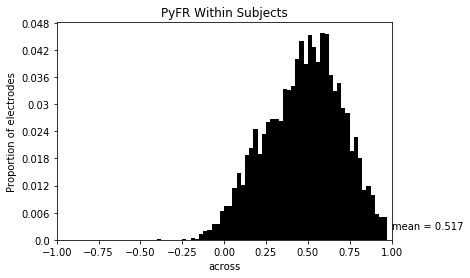

In [10]:
plot.plot_corr_hist(e_corrs, X='across', title='PyFR Within Subjects' )

In [56]:
grouped_results_pyfr.head()

,within,across,Sample rate,Samples,Sessions,Number thresholded,Total Time (hrs),Average Session Length (hrs),Total Electrodes,Proportion Thresholded
Subject,,,,,,,,,,
0,0.212619,0.604563,250.0,840750,2.0,10,0.934,0.467,64,0.156
1,0.440410,0.678031,250.0,1140710,1.0,12,1.267,1.267,40,0.300
2,0.423440,0.666532,250.0,1358998,2.0,53,1.510,0.755,96,0.552
3,0.313895,0.527044,250.0,2999442,2.0,5,3.333,1.666,16,0.312
4,0.386218,0.552446,250.0,2428415,3.0,4,2.698,0.899,64,0.062


mean: 2.475


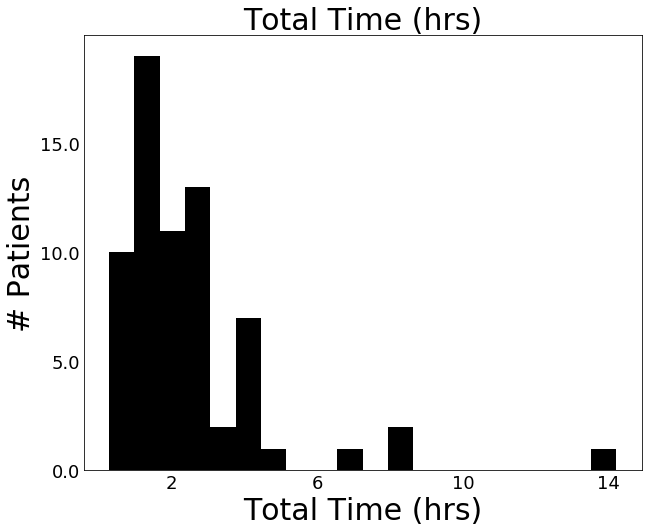

In [12]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_pyfr, 'Total Time (hrs)', title=None, outfile=outfile)

mean: 2.687


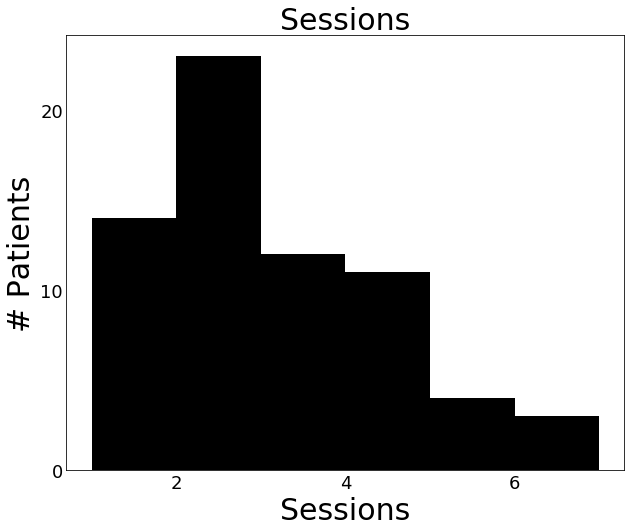

In [13]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_pyfr, 'Sessions', bins=6, title=None, outfile=outfile)

mean: 0.934


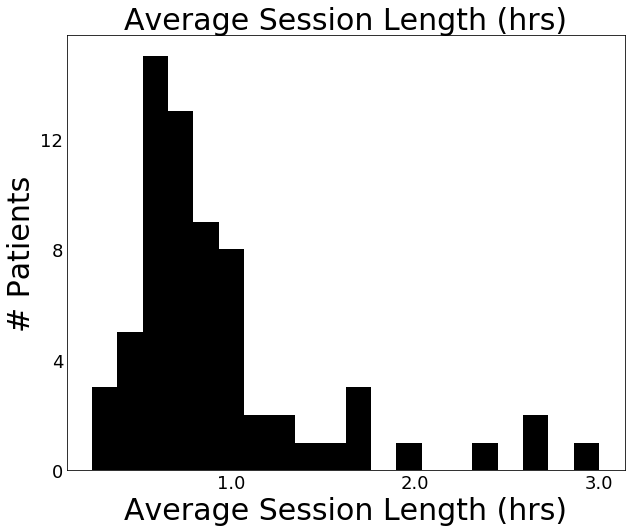

In [14]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_pyfr, 'Average Session Length (hrs)', title=None, outfile=outfile)

mean: 250.0


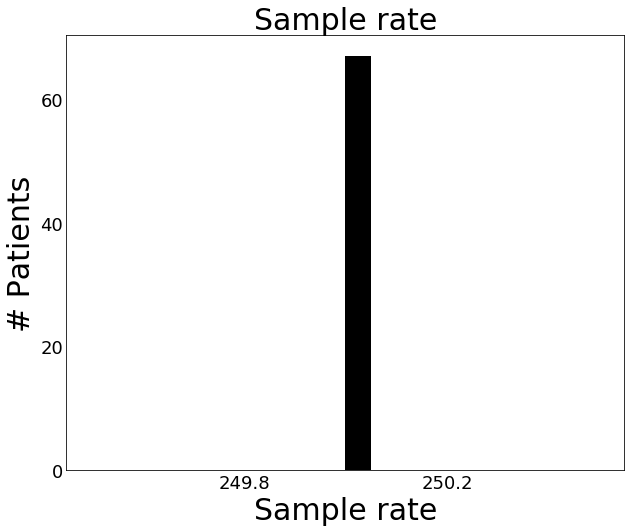

In [15]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_pyfr, 'Sample rate',  title=None, outfile=outfile)

mean: 0.278


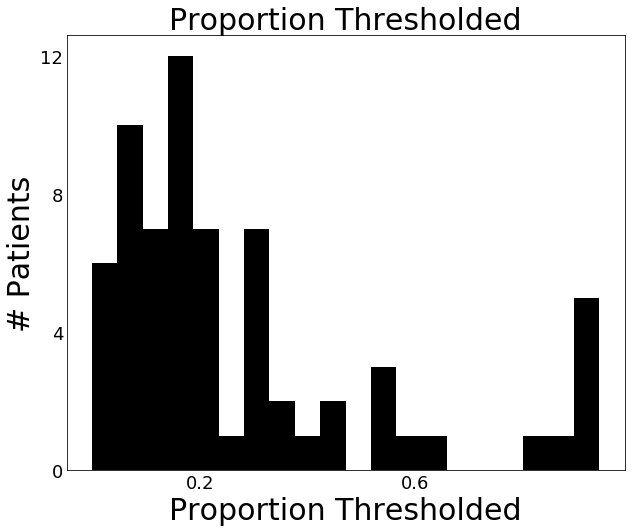

In [16]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_pyfr, 'Proportion Thresholded',title=None, outfile=outfile)

mean: 84.03


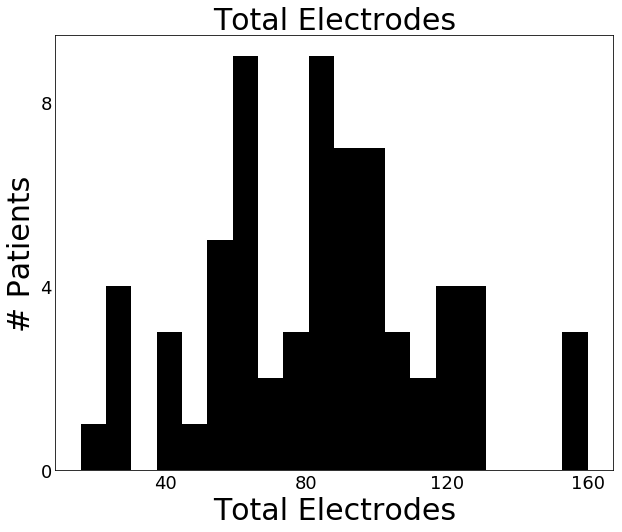

In [17]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_pyfr, 'Total Electrodes', title=None, outfile=outfile)

mean: 21.776


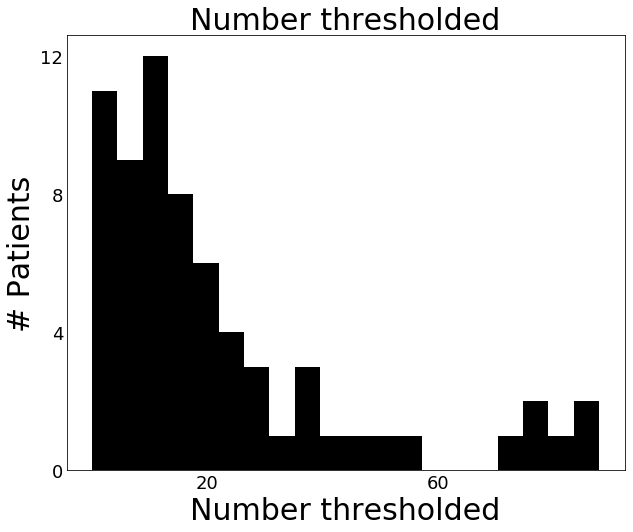

In [18]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_pyfr, 'Number thresholded', title=None, outfile=outfile)

(nan, 1.0)


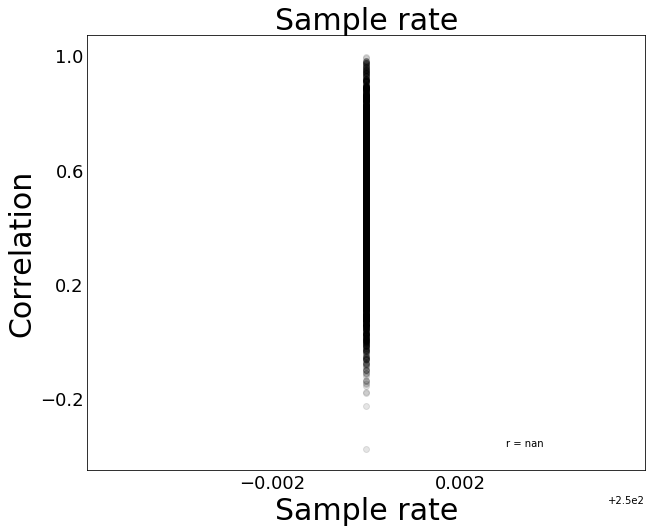

In [19]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(e_corrs,'Sample rate', 'across', title='Sample rate', outfile=outfile)

(0.048661909172164466, 0.0016749189069742638)


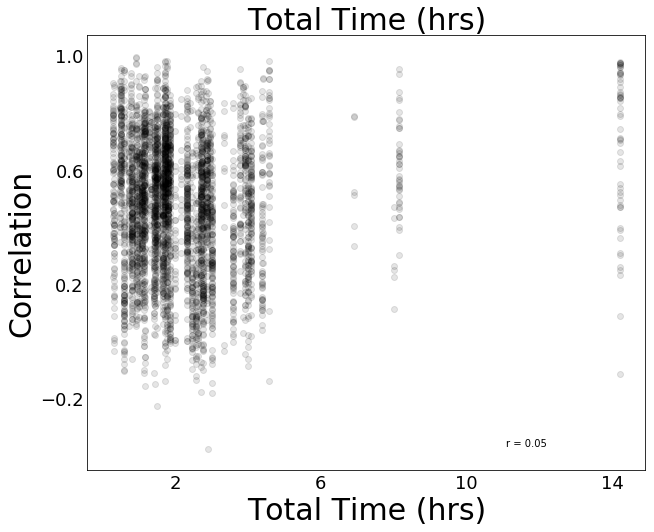

In [20]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(e_corrs, 'Total Time (hrs)','across',  title='Total Time (hrs)', outfile=outfile)

(0.03147943238199888, 0.042132629284261675)


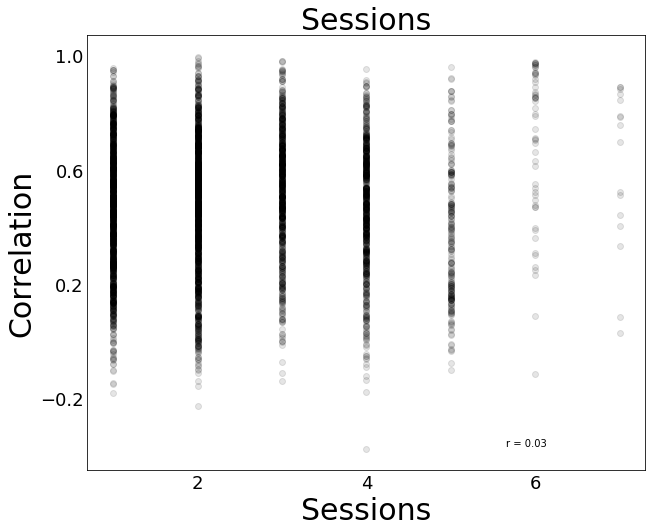

In [21]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(e_corrs, 'Sessions', 'across', title='Sessions', outfile=outfile)

(0.08572896751777445, 2.9697070762502448e-08)


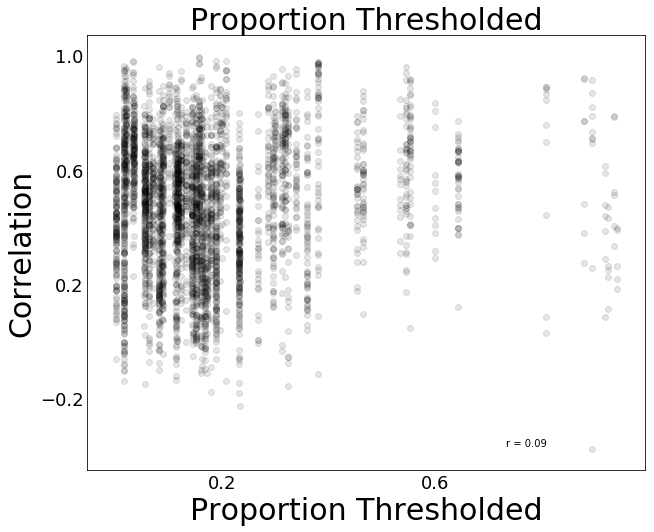

In [22]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(e_corrs, 'Proportion Thresholded', 'across', title='Proportion Thresholded', outfile=outfile)

(-0.1718364919918184, 5.487740842479245e-29)


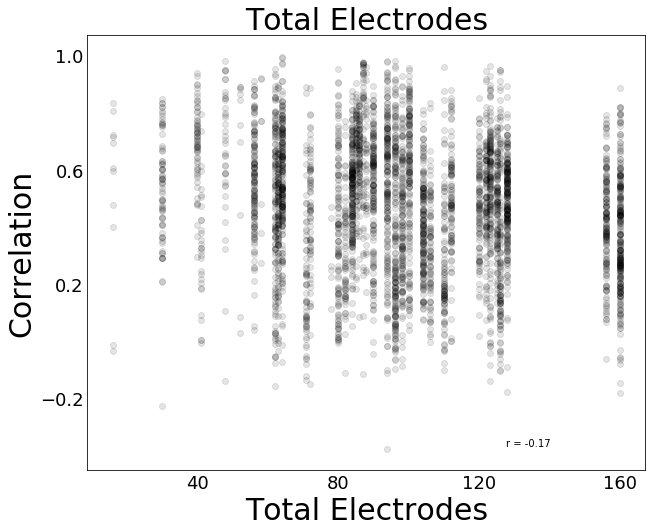

In [23]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(e_corrs, 'Total Electrodes', 'across', title='Total Electrodes', outfile=outfile)

(0.014317582078963451, 0.3554270070982001)


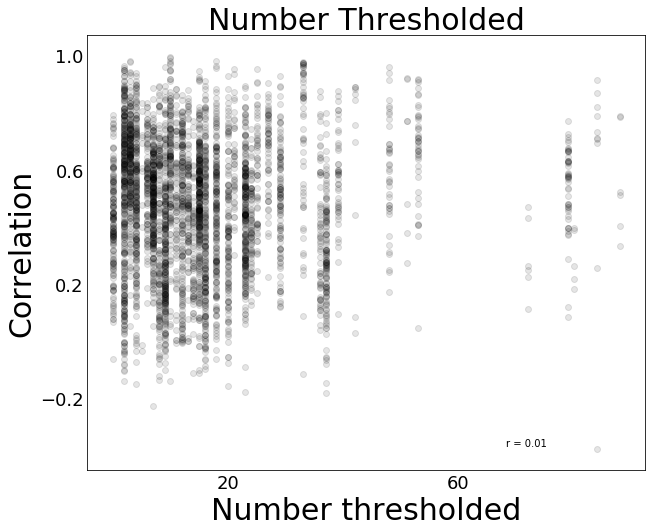

In [24]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(e_corrs,'Number thresholded', 'across', title='Number Thresholded', outfile=outfile)

# RAM

In [25]:
RAM_df = pd.read_csv(os.path.join(ram_data_dir, 'ram.csv'), index_col=0)

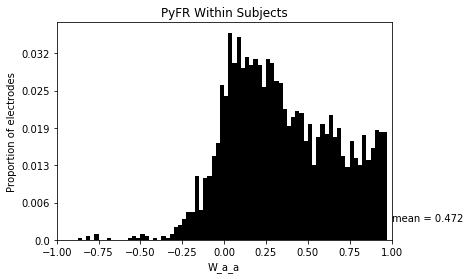

In [26]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_corr_hist(RAM_df, X='W_a_a', title='PyFR Within Subjects')

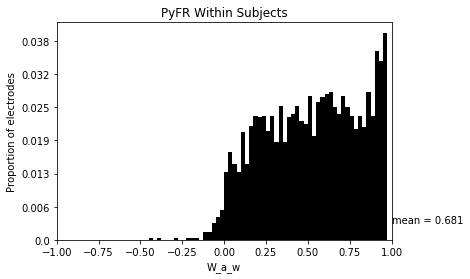

In [27]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_corr_hist(RAM_df, X='W_a_w', title='PyFR Within Subjects')

(-0.13852133263607203, 5.272488379091171e-15)


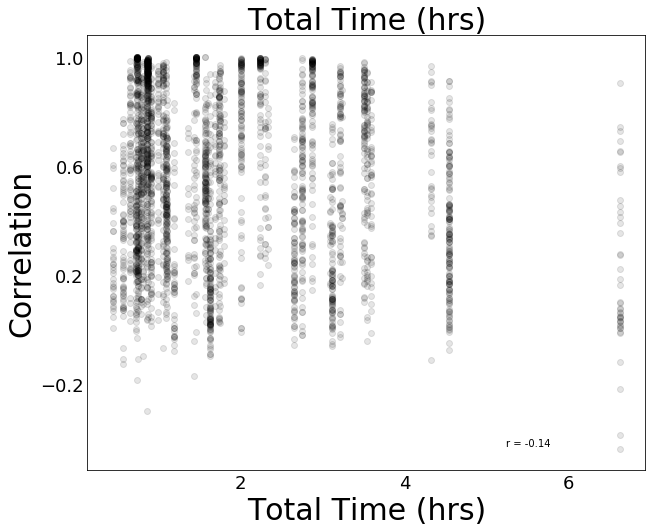

In [28]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(RAM_df,'Total Time (hrs)', 'W_a_w',  title='Total Time (hrs)', outfile=outfile)

(-0.14441648836593518, 3.4485897675167894e-16)


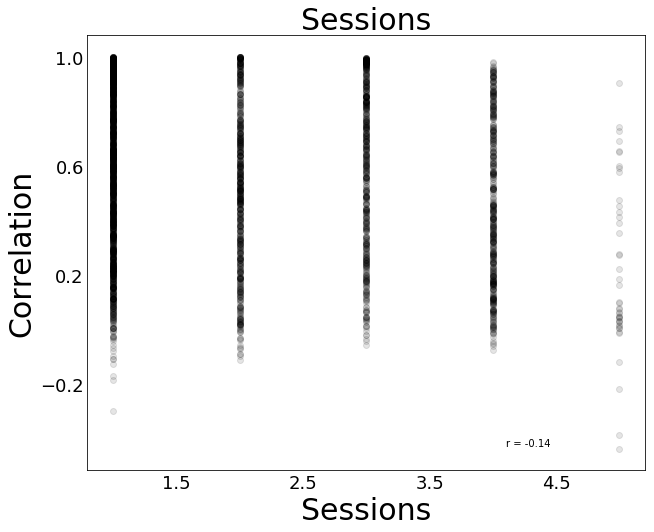

In [29]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(RAM_df, 'Sessions', 'W_a_w', title='Sessions', outfile=outfile)

(-0.08636843225960576, 1.1649891131056443e-06)


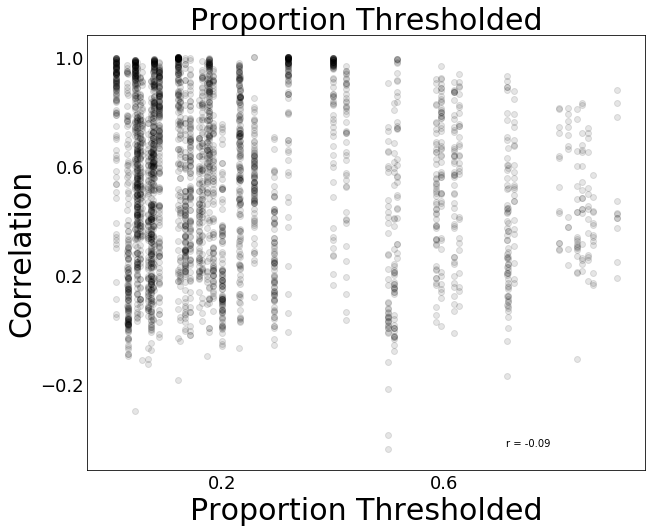

In [30]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(RAM_df, 'Proportion Thresholded', 'W_a_w', title='Proportion Thresholded', outfile=outfile)

(-0.040163681310167204, 0.023982067583539896)


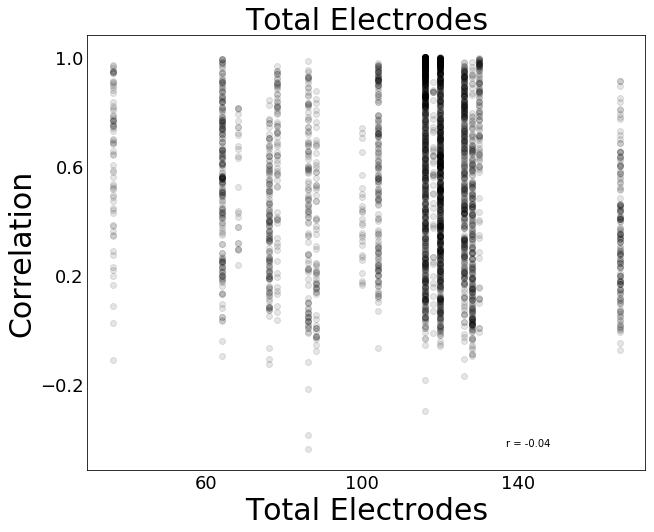

In [31]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(RAM_df, 'Total Electrodes', 'W_a_w', title='Total Electrodes', outfile=outfile)

(-0.0849854806807279, 1.7237825189884045e-06)


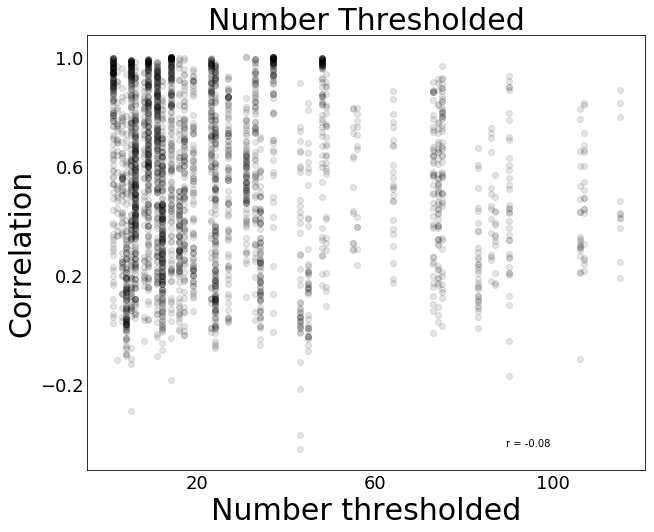

In [32]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(RAM_df,'Number thresholded', 'W_a_w', title='Number Thresholded', outfile=outfile)

In [33]:
grouped_results_ram = RAM_df.groupby('Subject')['W_w_w', 'W_w_a', 'W_w_all', 'W_a_w', 'W_a_a','W_a_all', 'Sample rate', 'Samples', 
                                                  'Sessions', 'Number thresholded', 'Total Time (hrs)', 'Average Session Length (hrs)', 
                                                  'Total Electrodes', 'Proportion Thresholded'].mean()

grouped_results_ram.head()

,W_w_w,W_w_a,W_w_all,W_a_w,W_a_a,W_a_all,Sample rate,Samples,Sessions,Number thresholded,Total Time (hrs),Average Session Length (hrs),Total Electrodes,Proportion Thresholded
Subject,,,,,,,,,,,,,,
0,0.205828,0.189667,0.178820,0.581201,0.268767,0.594463,250.0,8.026894e+05,1.484848,21.424242,0.891848,0.637303,104.000000,0.206273
1,0.084986,0.047676,0.072618,0.417310,0.319529,0.415247,250.0,1.716483e+06,2.391304,15.956522,1.907116,0.822362,120.000000,0.132971
2,0.085861,0.302263,0.134493,0.713625,0.357344,0.515095,250.0,1.056302e+06,1.432039,13.961165,1.173971,0.835684,120.000000,0.116010
3,0.088955,0.133387,0.136663,0.454674,0.314444,0.469922,250.0,2.596724e+06,2.495652,24.843478,2.885513,0.904522,86.000000,0.289009
4,0.370288,0.249215,0.134618,0.775062,0.337294,0.582972,250.0,1.885163e+06,1.804469,33.055866,2.094525,1.495196,125.977654,0.266698


mean: 1.844


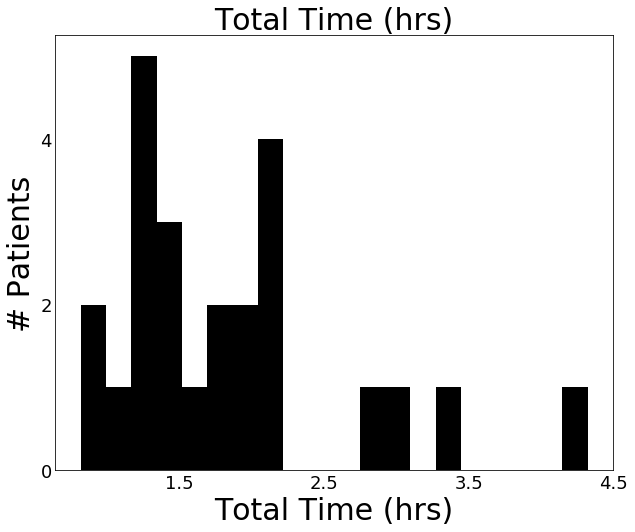

In [34]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_ram, 'Total Time (hrs)', title=None, outfile=outfile)

mean: 2.017


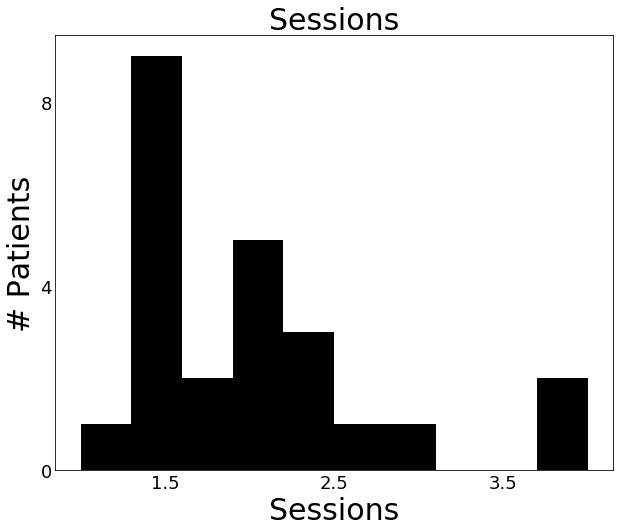

In [35]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_ram, 'Sessions', bins=10, title=None, outfile=outfile)

mean: 0.925


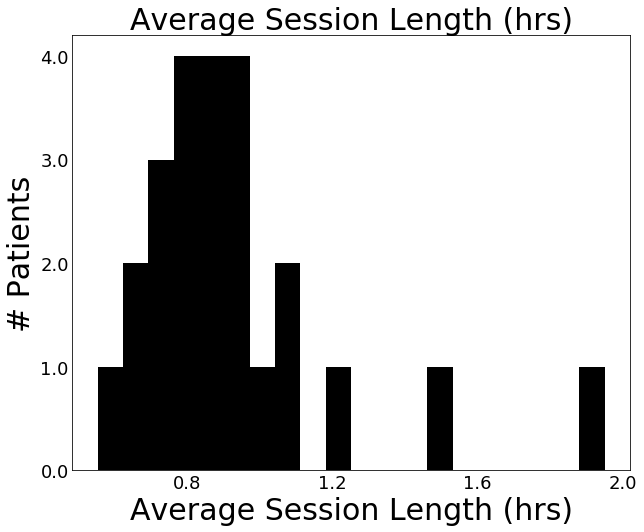

In [36]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_ram, 'Average Session Length (hrs)', title=None, outfile=outfile)

mean: 0.325


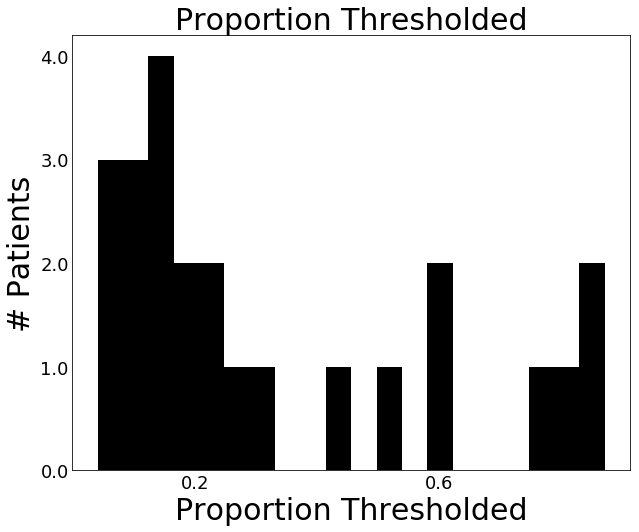

In [37]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_ram, 'Proportion Thresholded',title=None, outfile=outfile)

mean: 104.209


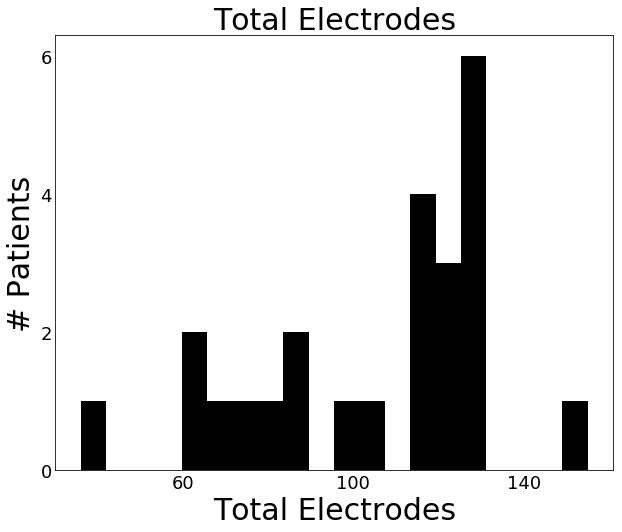

In [38]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_ram, 'Total Electrodes', title=None, outfile=outfile)

mean: 33.675


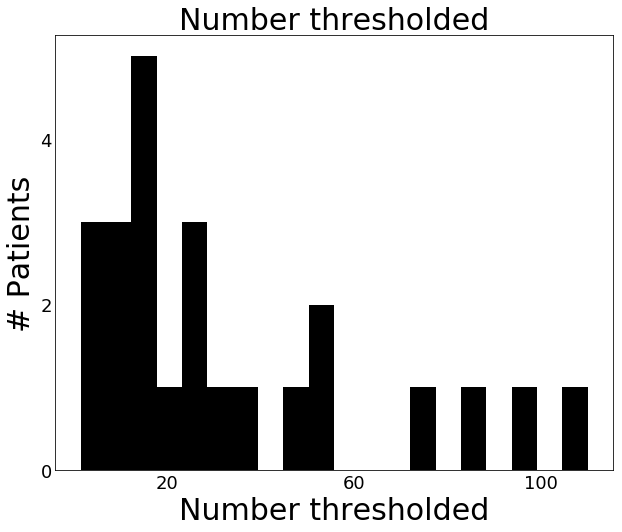

In [39]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_ram, 'Number thresholded', title=None, outfile=outfile)

## FR


In [40]:
str_find = '_FR1'
str_find
FR_df = RAM_df[RAM_df['Experiment'].str.contains(str_find)]

In [41]:
grouped_results_fr = FR_df.groupby('Subject')['W_w_w', 'W_w_a', 'W_w_all', 'W_a_w', 'W_a_a','W_a_all', 'Sample rate', 'Samples', 
                                                  'Sessions', 'Number thresholded', 'Total Time (hrs)', 'Average Session Length (hrs)', 
                                                  'Total Electrodes', 'Proportion Thresholded'].mean()

grouped_results_fr.head()

,W_w_w,W_w_a,W_w_all,W_a_w,W_a_a,W_a_all,Sample rate,Samples,Sessions,Number thresholded,Total Time (hrs),Average Session Length (hrs),Total Electrodes,Proportion Thresholded
Subject,,,,,,,,,,,,,,
0,0.187975,0.187306,0.179727,0.497704,0.217964,0.523803,250.0,668750,1.0,19,0.743,0.743,104,0.183
1,0.049456,0.082183,0.102014,0.245452,0.496176,0.360627,250.0,2807340,4.0,24,3.119,0.780,120,0.200
2,0.279704,0.038074,0.091884,0.560476,0.088325,0.282097,250.0,1410000,2.0,31,1.567,0.784,120,0.258
3,0.138513,0.166480,0.148491,0.219197,0.383467,0.513954,250.0,5959750,5.0,43,6.622,1.324,86,0.500
4,0.389251,0.198214,0.100740,0.830130,0.346655,0.623899,250.0,2011725,3.0,48,2.235,0.745,120,0.400


mean: 2.297


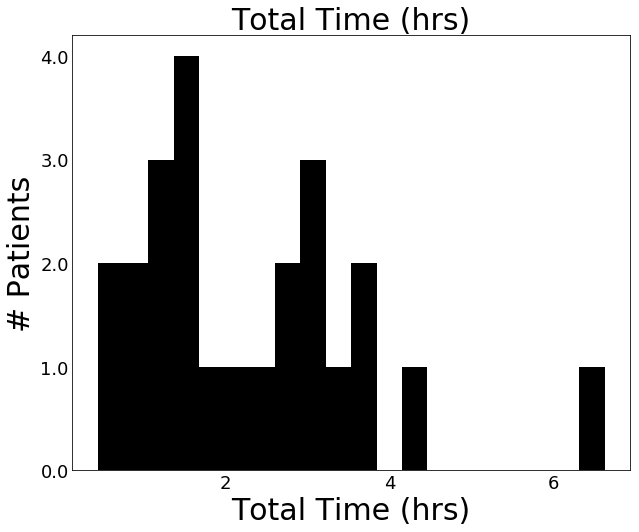

In [42]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_fr, 'Total Time (hrs)', title=None, outfile=outfile)

mean: 2.5


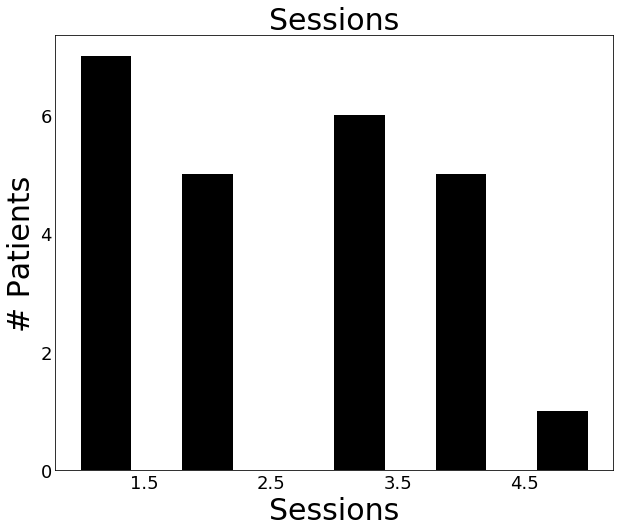

In [43]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_fr, 'Sessions', bins=10, title=None, outfile=outfile)

mean: 0.931


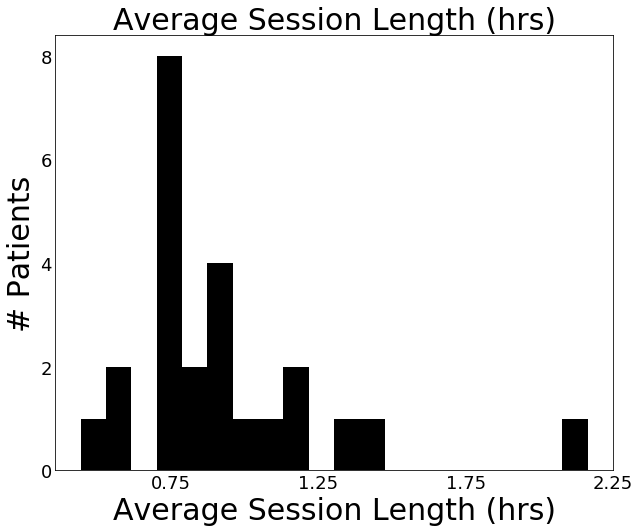

In [44]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_fr, 'Average Session Length (hrs)', title=None, outfile=outfile)

mean: 0.375


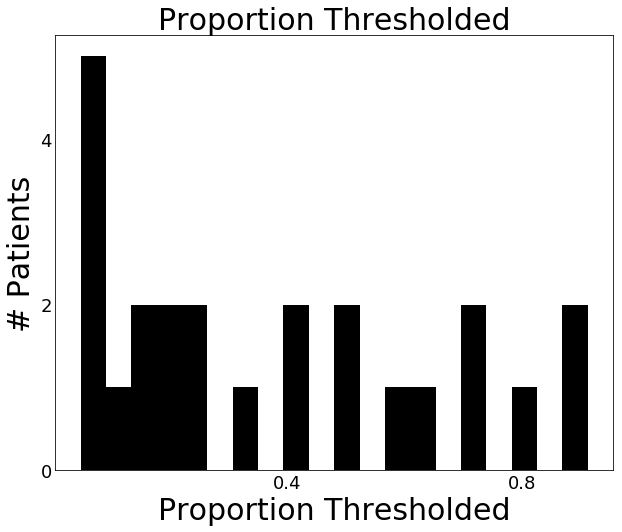

In [45]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_fr, 'Proportion Thresholded',title=None, outfile=outfile)

mean: 102.417


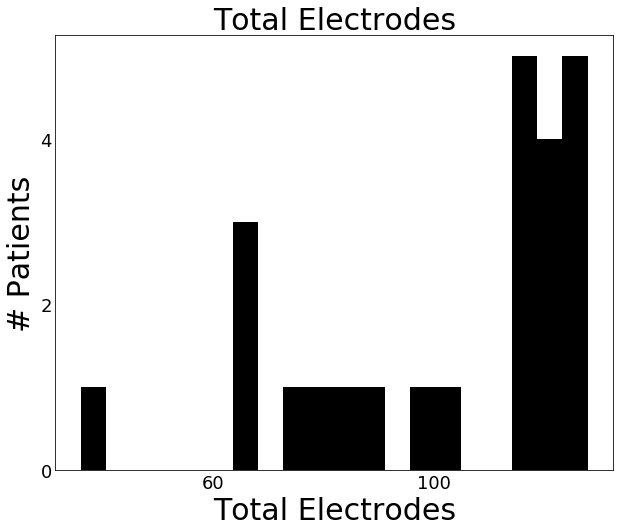

In [46]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_fr, 'Total Electrodes', title=None, outfile=outfile)

mean: 39.708


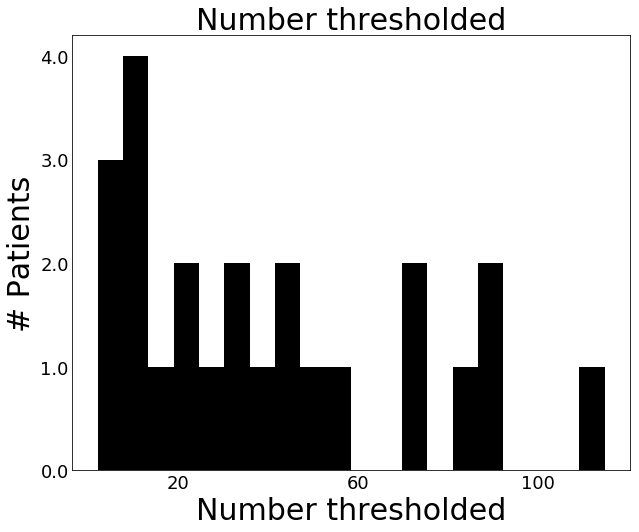

In [47]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_fr, 'Number thresholded', title=None, outfile=outfile)

## CatFR

In [48]:
str_find = '_CatFR1'
str_find
CatFR_df = RAM_df[RAM_df['Experiment'].str.contains(str_find)]

In [49]:
grouped_results_catfr = CatFR_df.groupby('Subject')['W_w_w', 'W_w_a', 'W_w_all', 'W_a_w', 'W_a_a','W_a_all', 'Sample rate', 'Samples', 
                                                  'Sessions', 'Number thresholded', 'Total Time (hrs)', 'Average Session Length (hrs)', 
                                                  'Total Electrodes', 'Proportion Thresholded'].mean()
grouped_results_catfr.head()

,W_w_w,W_w_a,W_w_all,W_a_w,W_a_a,W_a_all,Sample rate,Samples,Sessions,Number thresholded,Total Time (hrs),Average Session Length (hrs),Total Electrodes,Proportion Thresholded
Subject,,,,,,,,,,,,,,
0,0.224796,0.192176,0.177856,0.669916,0.322746,0.669539,250.0,945000,2.0,24,1.050,0.525,104,0.231
1,0.115714,0.017832,0.047194,0.565943,0.166754,0.462487,250.0,773040,1.0,9,0.859,0.859,120,0.075
2,-0.061593,0.503227,0.166904,0.830124,0.561983,0.692332,250.0,787250,1.0,1,0.875,0.875,120,0.008
3,0.059358,0.113624,0.129599,0.595307,0.273222,0.443625,250.0,588250,1.0,14,0.654,0.654,86,0.163
4,0.357527,0.283534,0.157415,0.738007,0.330996,0.555433,250.0,1800000,1.0,23,2.000,2.000,130,0.177


mean: 1.465


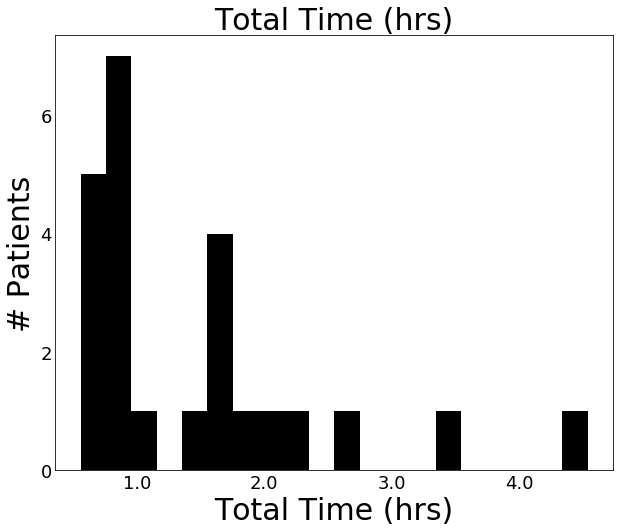

In [50]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_catfr, 'Total Time (hrs)', title=None, outfile=outfile)

mean: 1.667


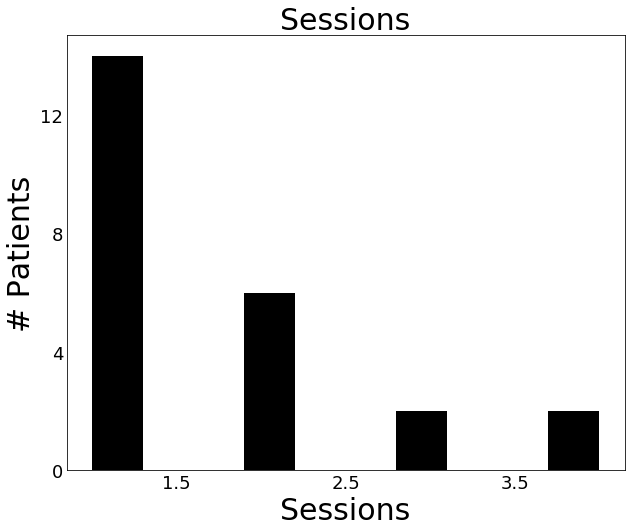

In [51]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_catfr, 'Sessions', bins=10, title=None, outfile=outfile)

mean: 0.886


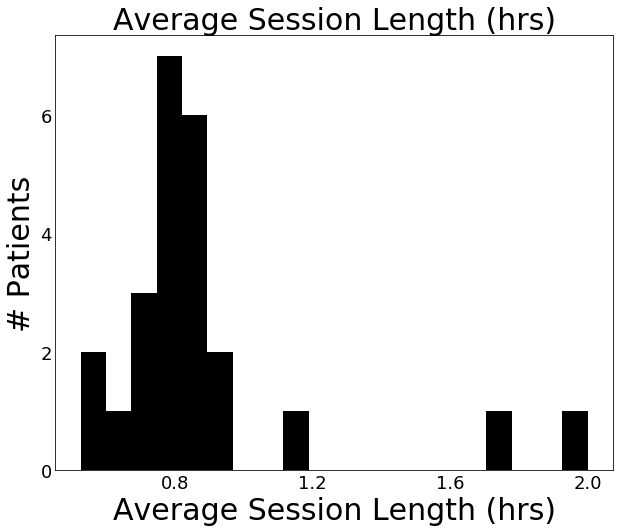

In [52]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_catfr, 'Average Session Length (hrs)', title=None, outfile=outfile)

mean: 0.316


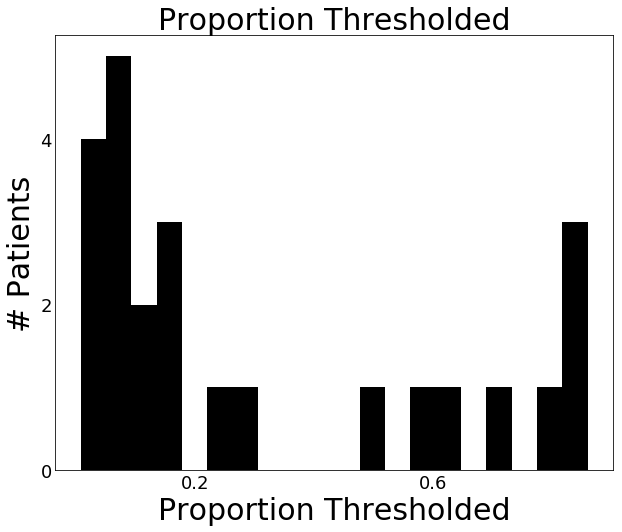

In [53]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_catfr, 'Proportion Thresholded',title=None, outfile=outfile)

mean: 104.833


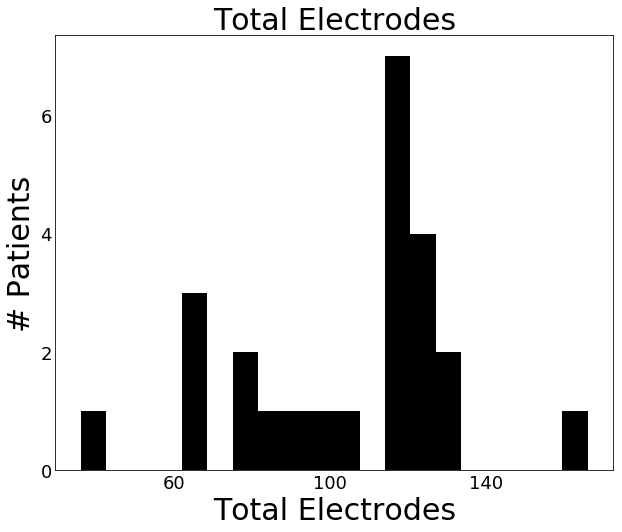

In [54]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_catfr, 'Total Electrodes', title=None, outfile=outfile)

mean: 31.875


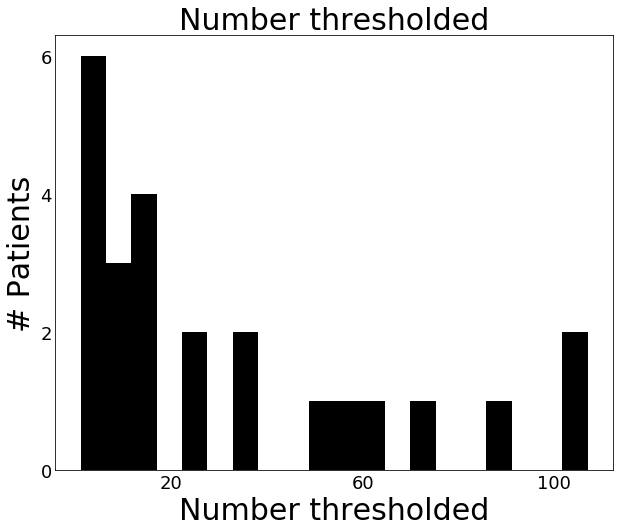

In [55]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_catfr, 'Number thresholded', title=None, outfile=outfile)